## Préparation et analyse de données sous la forme ligne/colonne

<img src="img/pydata_logo.png" style="height: 100px; width: auto;"/>

In [27]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML, IFrame
InteractiveShell.ast_node_interactivity = "all"

Les biliothèques qui vont être utilisées relèvent de l'écosystème *PyData* (un groupe d'utilisateurs / de developpeurs et une série de conférences autour de l'analyse de données - ainsi que les bibliothèques comme `pandas` et `xarray`).

### Pandas

- Permet de manipuler des objets de type `DataFrame`.

- Inspirée par les `data.frame` R.

- API riche, bonne performance, compatibilité avec le reste de l'écosystème.

##### Exemple : prix de la weed

<img src="img/priceweed_logo.png" />

Les données proviennent de **The Price of Weed website** : http://www.priceofweed.com/  

Un utilisateur a récupéré les données journalières (**491 dates**) pour les **51 états américains** : https://github.com/frankbi/price-of-weed/

On va regarder comment ouvrir, nettoyer et manipuler ces données avec **pandas**

In [28]:
# Imports nécessaires 
import pandas as pd
import numpy as np
import os

# Lister les fichiers du dossier contenant les données :
files = os.listdir('data/prices')
files

['weedprices13082014.csv',
 'weedprices02022015.csv',
 'weedprices25052014.csv',
 'weedprices08022015.csv',
 'weedprices20062015.csv',
 'weedprices27082014.csv',
 'weedprices22012015.csv',
 'weedprices13072014.csv',
 'weedprices08062014.csv',
 'weedprices10082014.csv',
 'weedprices09032014.csv',
 'weedprices03012014.csv',
 'weedprices31052015.csv',
 'weedprices21042014.csv',
 'weedprices08092014.csv',
 'weedprices12012014.csv',
 'weedprices06062014.csv',
 'weedprices04072014.csv',
 'weedprices10102014.csv',
 'weedprices29032014.csv',
 'weedprices11012015.csv',
 'weedprices18072014.csv',
 'weedprices03022014.csv',
 'weedprices20042014.csv',
 'weedprices29102014.csv',
 'weedprices03122014.csv',
 'weedprices02022014.csv',
 'weedprices18062014.csv',
 'weedprices19022014.csv',
 'weedprices13022014.csv',
 'weedprices07102014.csv',
 'weedprices03112014.csv',
 'weedprices14022015.csv',
 'weedprices27012015.csv',
 'weedprices16042014.csv',
 'weedprices24032014.csv',
 'weedprices11052014.csv',
 

In [29]:
# Ouverture du premier fichier pour voir sa structure :
df = pd.read_csv(os.path.join('data', 'prices', files[0]))

df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,340.21,1391,203.97,1254,145.79,160
1,Alaska,289.81,327,260.97,404,403.33,33
2,Arizona,300.50,2407,209.48,2139,186.92,281
3,Arkansas,347.19,752,180.98,722,126.20,134
4,California,245.33,15081,191.63,16853,187.83,987


In [30]:
# Avant de concaténer les différents fichiers, on devra ajouter la date à chaque de ces fichiers :
date_file = files[0].replace('weedprices', '').replace('.csv', '') # 'weedprices13082014.csv' -> '13082014'
date_file = '-'.join([date_file[:2], date_file[2:4], date_file[4:]]) # '13082014' -> '13-08-2014'
date_file = pd.to_datetime(date_file, dayfirst=True)
df['date'] = date_file
df.head(3)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,340.21,1391,203.97,1254,145.79,160,2014-08-13
1,Alaska,289.81,327,260.97,404,403.33,33,2014-08-13
2,Arizona,300.50,2407,209.48,2139,186.92,281,2014-08-13


In [31]:
# On définit une function qui va s'occuper de convertir le nom de fichier en date
def datetime_from_filename(filename):
    date_file = filename.replace('weedprices', '').replace('.csv', '')
    return pd.to_datetime(
        '-'.join([date_file[:2], date_file[2:4], date_file[4:]]),
        dayfirst=True
        )

In [32]:
# On va concaténer ces DataFrame de manière séquentielle :
dfs = []
for name in files:
    df = pd.read_csv(os.path.join('data', 'prices', name))
    df['date'] = datetime_from_filename(name)
    dfs.append(df)

result = pd.concat(dfs, ignore_index=True)

In [33]:
result.head()
result.tail()
result.dtypes

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,340.21,1391,203.97,1254,145.79,160,2014-08-13
1,Alaska,289.81,327,260.97,404,403.33,33,2014-08-13
2,Arizona,300.5,2407,209.48,2139,186.92,281,2014-08-13
3,Arkansas,347.19,752,180.98,722,126.2,134,2014-08-13
4,California,245.33,15081,191.63,16853,187.83,987,2014-08-13


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
24985,Virginia,366.49,3216,291.63,2785,I feel bad for these guys -->,262,2014-10-03
24986,Washington,233.19,3082,189.52,3238,I feel bad for these guys -->,145,2014-10-03
24987,West Virginia,354.97,506,216.72,494,I feel bad for these guys -->,57,2014-10-03
24988,Wisconsin,352.31,2073,272.68,1979,I feel bad for these guys -->,153,2014-10-03
24989,Wyoming,328.51,119,355.77,172,I feel bad for these guys -->,12,2014-10-03


State             object
HighQ             object
HighQN            object
MedQ              object
MedQN             object
LowQ              object
LowQN             object
date      datetime64[ns]
dtype: object

##### Il va falloir nettoyer les données et effectuer des conversions de types pour les manipuler et les analyser par la suite

In [34]:
# Le type des éléments dans ces colones est hétérogène (float, str, d'où la notation 'object')
result['HighQ'] = result['HighQ'].apply(lambda x: float(x.replace('$', '')) if isinstance(x, str) else x)
result['MedQ'] = result['MedQ'].apply(lambda x: float(x.replace('$', '')) if isinstance(x, str) else x)

# Cette colonne contient des valeurs inutilisables, on va les convertir en une valeur
# numérique qui à ce sens : NaN
result['LowQ'] = result['LowQ'].apply(lambda x: x.replace('$', '') if isinstance(x, str) else x)
result['LowQ'] = pd.to_numeric(result['LowQ'], errors='coerce')

# Les autre colonnes contiennent des entiers et ne présentent pas de problèmes
result['HighQN'] = result['HighQN'].astype(int)
result['MedQN'] = result['MedQN'].astype(int)
result['LowQN'] = result['LowQN'].astype(int)

In [35]:
result.head()
result.tail()
result.dtypes

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,340.21,1391,203.97,1254,145.79,160,2014-08-13
1,Alaska,289.81,327,260.97,404,403.33,33,2014-08-13
2,Arizona,300.50,2407,209.48,2139,186.92,281,2014-08-13
3,Arkansas,347.19,752,180.98,722,126.20,134,2014-08-13
4,California,245.33,15081,191.63,16853,187.83,987,2014-08-13


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
24985,Virginia,366.49,3216,291.63,2785,NaN,262,2014-10-03
24986,Washington,233.19,3082,189.52,3238,NaN,145,2014-10-03
24987,West Virginia,354.97,506,216.72,494,NaN,57,2014-10-03
24988,Wisconsin,352.31,2073,272.68,1979,NaN,153,2014-10-03
24989,Wyoming,328.51,119,355.77,172,NaN,12,2014-10-03


State             object
HighQ            float64
HighQN             int64
MedQ             float64
MedQN              int64
LowQ             float64
LowQN              int64
date      datetime64[ns]
dtype: object

#### Quelques opérations de base sur notre table de données :

In [36]:
# Obtenir des lignes spécifiques :
result[2:4]

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
2,Arizona,300.50,2407,209.48,2139,186.92,281,2014-08-13
3,Arkansas,347.19,752,180.98,722,126.20,134,2014-08-13


In [37]:
# Obtenir une colonne :
result['State']

0                     Alabama
1                      Alaska
2                     Arizona
3                    Arkansas
4                  California
5                    Colorado
6                 Connecticut
7                    Delaware
8        District of Columbia
9                     Florida
10                    Georgia
11                     Hawaii
12                      Idaho
13                   Illinois
14                    Indiana
15                       Iowa
16                     Kansas
17                   Kentucky
18                  Louisiana
19                      Maine
20                    Montana
21                   Nebraska
22                     Nevada
23              New Hampshire
24                 New Jersey
25                 New Mexico
26                   New York
27             North Carolina
28               North Dakota
29                       Ohio
                 ...         
24960                Nebraska
24961                  Nevada
24962     

In [38]:
result.loc[0]

State                 Alabama
HighQ                  340.21
HighQN                   1391
MedQ                   203.97
MedQN                    1254
LowQ                   145.79
LowQN                     160
date      2014-08-13 00:00:00
Name: 0, dtype: object

In [39]:
# Index et nom de colonne
result.loc[0, 'State']

'Alabama'

In [40]:
# Index et index de colonne
result.iloc[0, 0]

'Alabama'

In [41]:
# Sélection de lignes ou le prix pour l'Alabama est inférieur à 340$ pour la plus haute qualité:
result[result.eval('State == "Alabama" and HighQ < 340.0')]

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
51,Alabama,335.86,1584,209.19,1525,NaN,193,2015-02-02
153,Alabama,335.45,1592,209.87,1542,NaN,195,2015-02-08
204,Alabama,337.40,1890,206.12,1808,NaN,218,2015-06-20
306,Alabama,336.04,1573,209.45,1506,NaN,188,2015-01-22
561,Alabama,339.20,1043,198.64,933,148.48,124,2014-01-03
612,Alabama,337.29,1888,206.17,1805,NaN,218,2015-05-31
918,Alabama,339.36,1430,204.52,1318,NaN,164,2014-10-10
1020,Alabama,336.91,1553,209.09,1478,NaN,184,2015-01-11
1122,Alabama,339.16,1100,200.16,987,152.02,129,2014-02-03
1224,Alabama,338.62,1448,205.01,1342,NaN,171,2014-10-29


In [42]:
# Export au format CSV pour le réutiliser par la suite :
result.to_csv('data/weed_prices.csv', index=False)

### Seaborn

Seaborn propose une API de haut-niveau (basée sur **matplotlib** en interne) permettant d'utiliser directement des `DataFrame` de **pandas**.

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
4,California,245.33,15081,191.63,16853,187.83,987,2014-08-13
55,California,243.29,16916,188.94,19780,NaN,1123,2015-02-02
106,California,245.76,14084,192.30,15463,190.09,918,2014-05-25
157,California,243.13,16995,188.86,19889,NaN,1133,2015-02-08
208,California,241.93,18504,187.89,22036,NaN,1232,2015-06-20


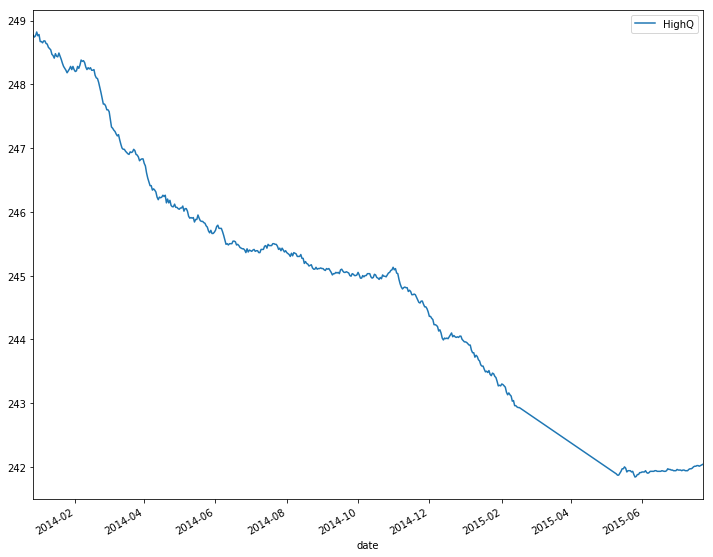

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 10)

# En continuant d'utiliser les données ouvertes précédemment..
# représentons l'évolution du prix en Californie
df_cal = result[result["State"] == "California"]
df_cal.head()
df_cal.plot(x = "date", y = "HighQ")  # plot est ici une méthode de l'objet DataFrame

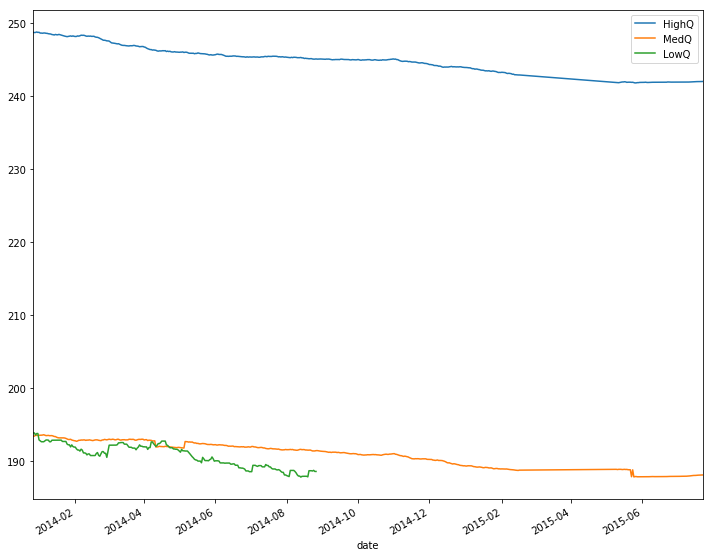

In [44]:
# Pour les 3 catégories ?
df_cal[["HighQ", "MedQ", "LowQ", "date"]].plot(x='date')

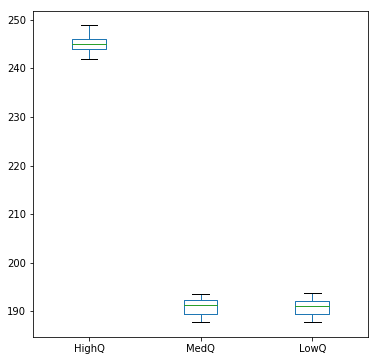

In [45]:
# Sous forme de boite à moustache
df_cal[["HighQ", "MedQ", "LowQ"]].plot(kind = "box", figsize=(6,6))

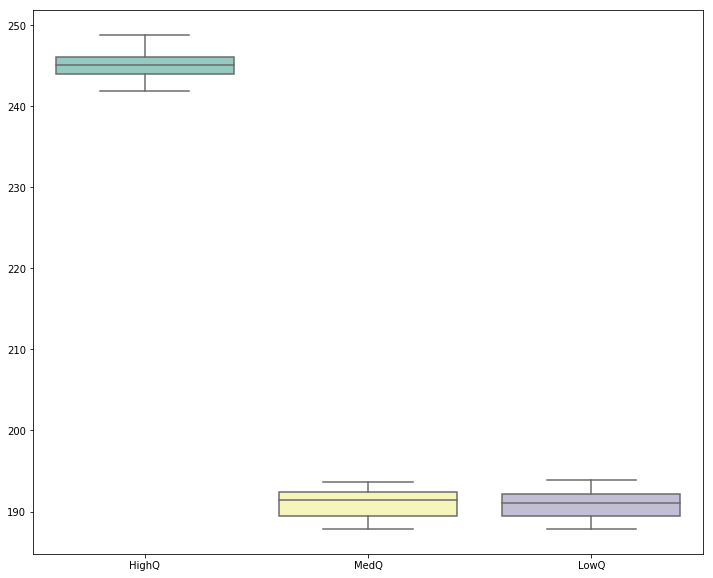

In [46]:
# En utilisant directement l'API de Seaborn
sns.boxplot(data=df_cal[["HighQ", "MedQ", "LowQ"]], palette='Set3')

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


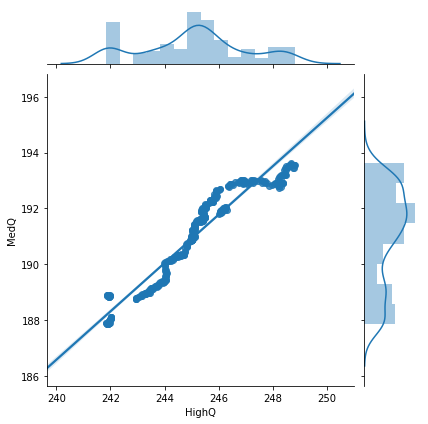

In [47]:
# Seaborn propose de tracer assez facilement d'autres types de graphiques:
sns.jointplot(data=df_cal, x='HighQ', y='MedQ', kind="reg")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


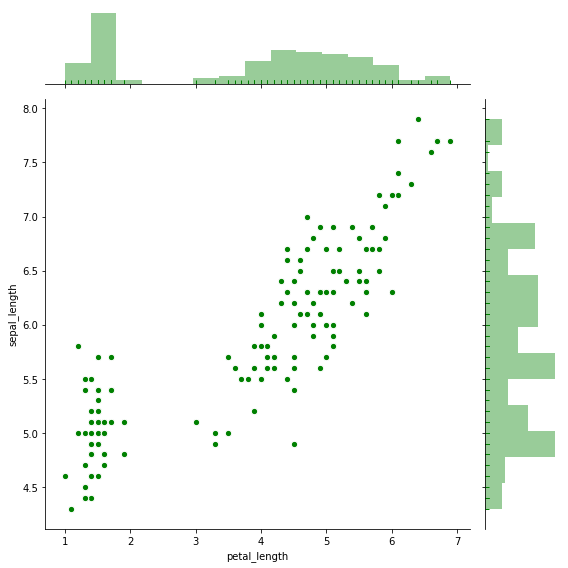

In [48]:
iris = sns.load_dataset("iris")
g = sns.jointplot("petal_length", "sepal_length", data=iris, color='g',
    marginal_kws=dict(bins=15, rug=True),
    s=40, edgecolor="w", linewidth=1, size=8)

### xarray


<img src="img/xarray_logo.png" style="height: 100px; width: auto;"/>

- Permet de manipuler des jeux de données structurés de dimensions arbitraires _(pandas sur N dimensions)_

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns

import xarray as xr


times = pd.date_range('2000-01-01', '2001-12-31', name='time')
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

# Un `DataSet` de xarray :
ds = xr.Dataset({
        'tmin': (('time', 'location'), tmin_values),
        'tmax': (('time', 'location'), tmax_values)
    }, {
        'time': times, 'location': ['IA', 'IN', 'IL'],
    })

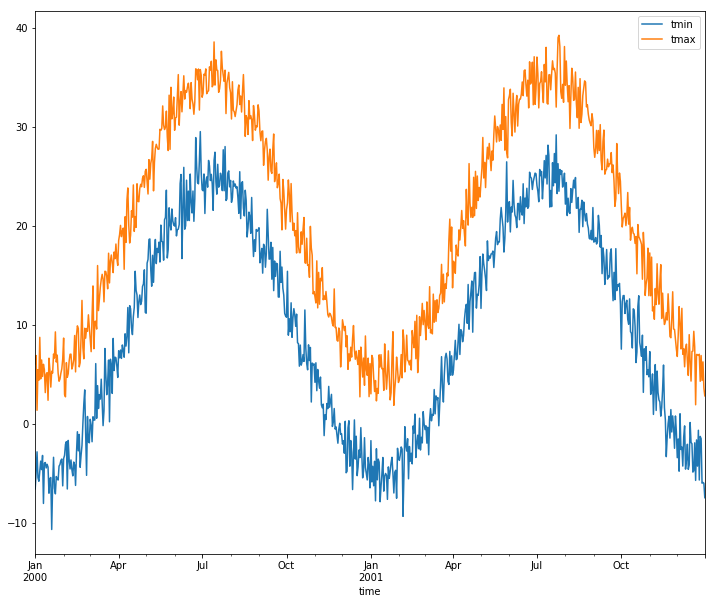

In [50]:
# Conversion d'une dimension en DataFrame
# pour afficher avec Seaborn :
ds.mean(dim='location').to_dataframe().plot()

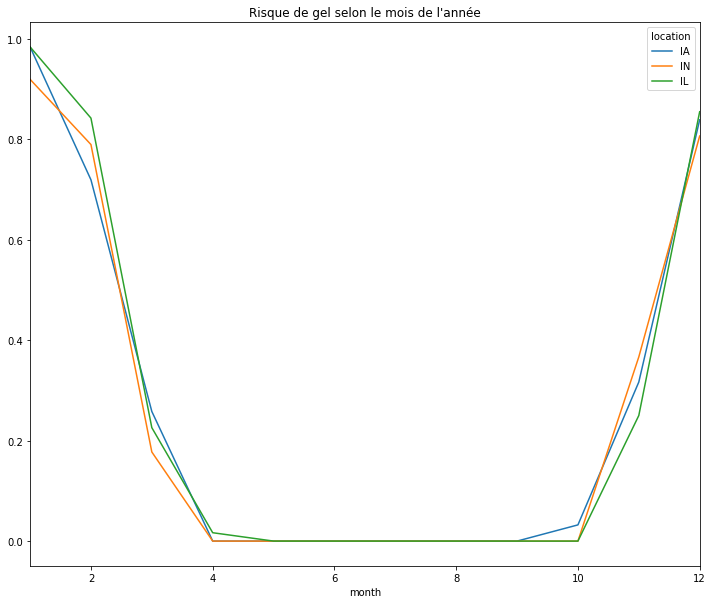

In [51]:
## Risque de gel selon le mois et la localité :
freeze = (ds['tmin'] <= 0).groupby('time.month').mean('time')
freeze.to_pandas().plot(title="Risque de gel selon le mois de l'année")

### Partie suivante ...

#### 5. [Analyse statistique, modélisation et apprentissage](StatsML.slides.html)